# DBSCAN

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import cycle, islice
from sklearn.cluster import DBSCAN

In [3]:
dataset_1 = pd.read_csv('blobs.csv')[:80].values

In [5]:
figsize = (10,10)
point_size=150
point_border=0.8

def plot_dataset(dataset, xlim=(-15, 15), ylim=(-15, 15)):
    plt.figure(figsize=figsize)
    plt.scatter(dataset[:,0], dataset[:,1], s=point_size, color="#00B3E9", edgecolor='black', lw=point_border)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show()

In [11]:
def plot_clustered_dataset(dataset, y_pred, xlim=(-15, 15), ylim=(-15, 15), neighborhood=False, epsilon=0.5):
    
    fig, ax = plt.subplots(figsize=figsize)
    
    colors = np.array(list(islice(cycle(['#df8efd', '#78c465', '#ff8e34',
                                     '#f65e97', "#301bcc", '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1))))
    colors = np.append(colors, '#BECBD6')
    
    
    if neighborhood:
        for point in dataset:
            circle1 = plt.Circle(point, epsilon, color='#666666', fill=False, zorder=0, alpha=0.3)
            ax.add_artist(circle1)

    ax.scatter(dataset[:, 0], dataset[:, 1], s=point_size, color=colors[y_pred], zorder=10, edgecolor='black', lw=point_border)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show()

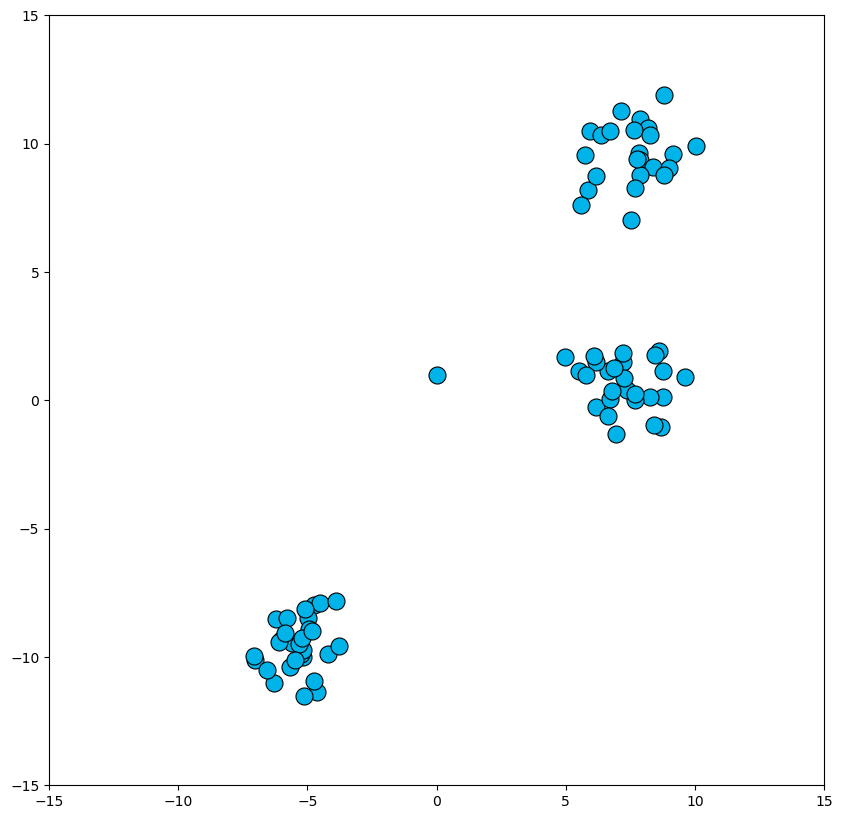

In [9]:
plot_dataset(dataset_1)

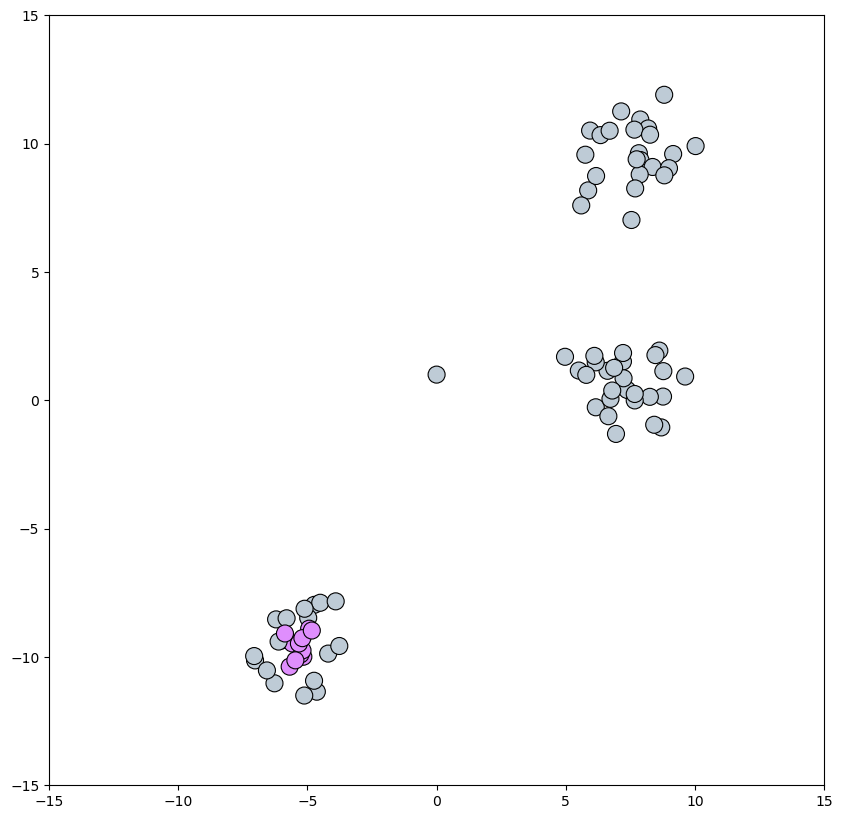

In [12]:
dbscan = DBSCAN()
clustering_labels_1 = dbscan.fit_predict(dataset_1)

plot_clustered_dataset(dataset_1, clustering_labels_1)

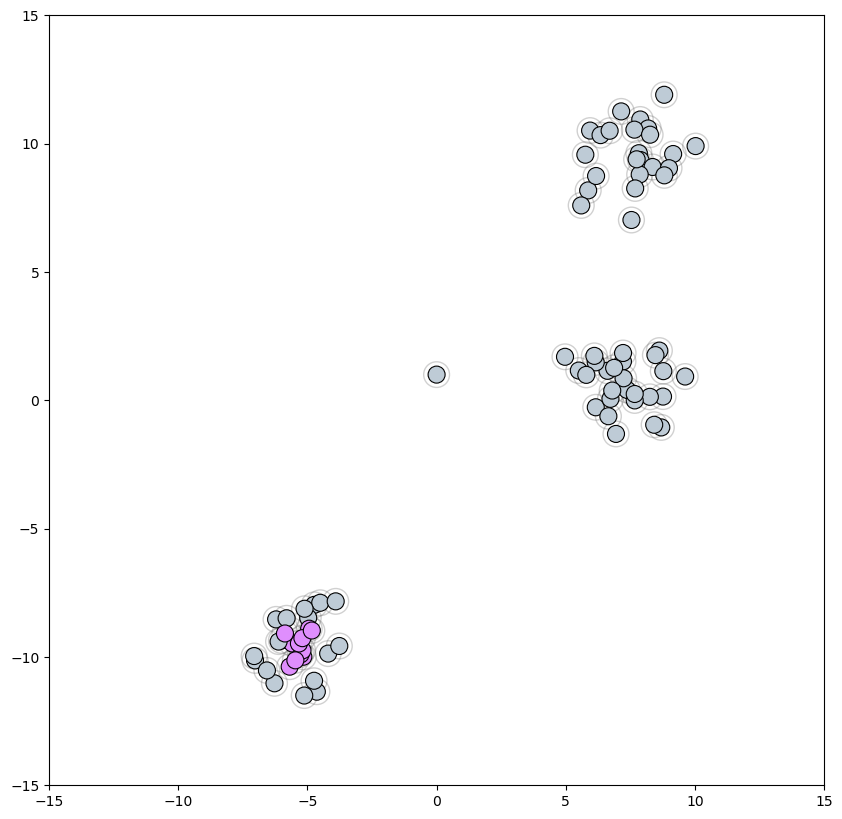

In [13]:
plot_clustered_dataset(dataset_1, clustering_labels_1, neighborhood=True)

TODO: Cambia el valor de epsilon de manera que todos los puntos queden asignados a algún cluster (sin que existan puntos clasificados como ruido). Utiliza la función plot_clustered_dataset para visualizar los clusteres obtenidos junto con su vecindario.

- ¿Cuál es el mínimo valor de epsilon que permite que todos los puntos pertenezcan a un clúster?

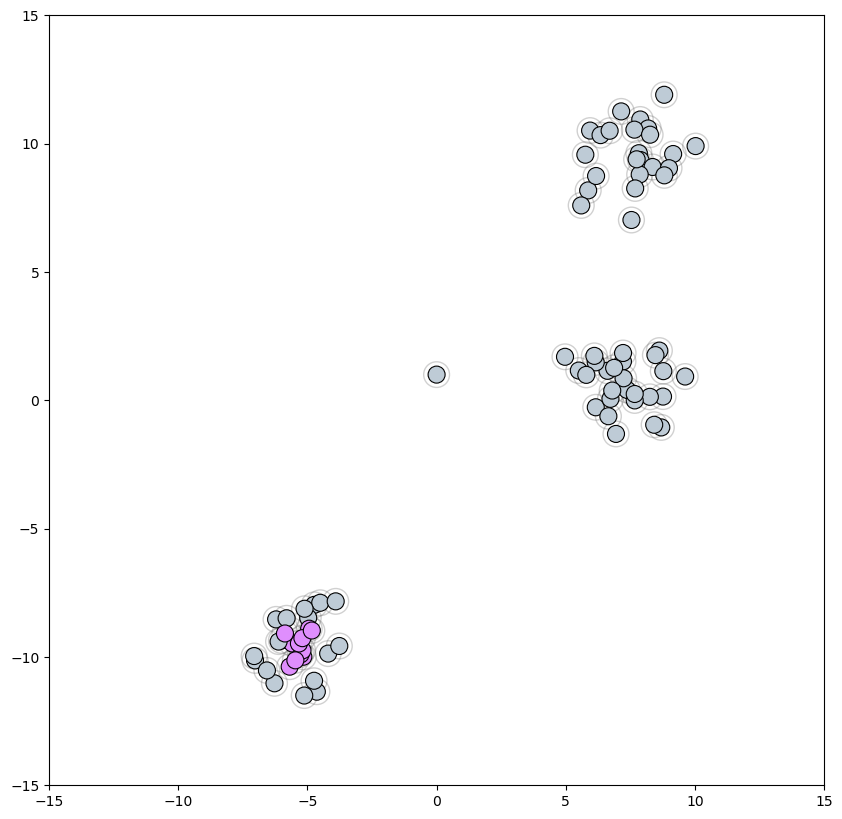

In [30]:
#TODO: Cambia el valor de epsilon de manera que todos los puntos queden asignados a algún 
# cluster (sin que existan puntos clasificados como ruido). Utiliza la función plot_clustered_dataset 
# para visualizar los clusteres obtenidos junto con su vecindario.

#- ¿Cuál es el mínimo valor de epsilon que permite que todos los puntos pertenezcan a un clúster?
dbscan = DBSCAN(eps=0.5)
clustering_labels_2 = dbscan.fit_predict(dataset_1)
plot_clustered_dataset(dataset_1, clustering_labels_2, neighborhood=True, epsilon=0.5)

TODO: ¿Qué ocurre si aumentamos el epsilon a un valor de 6? Pruébalo.

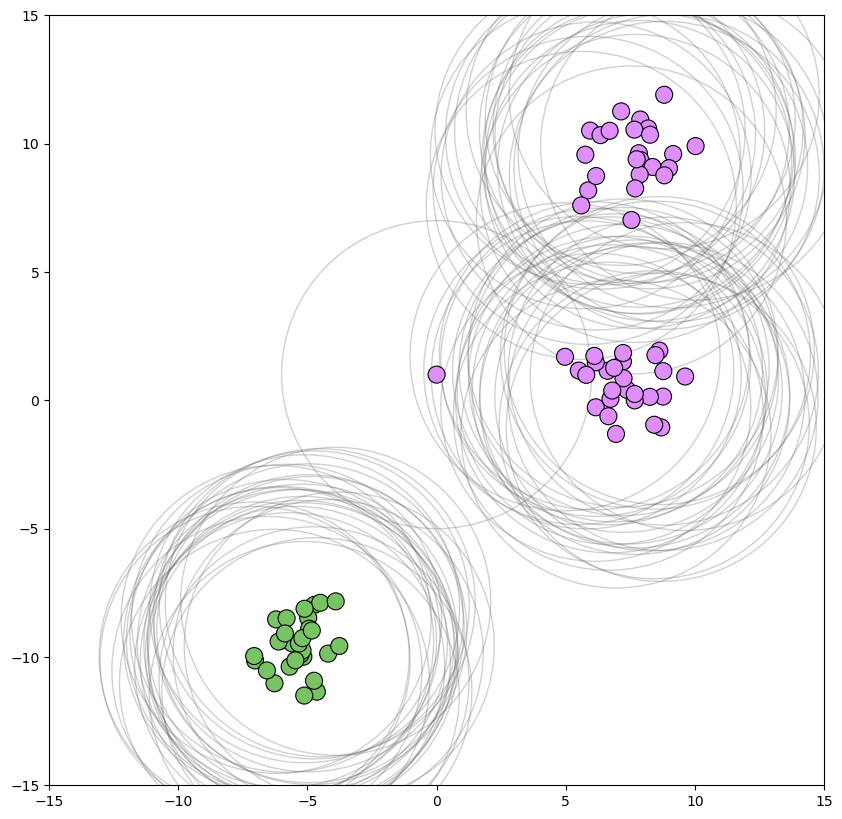

Etiquetas de los clusters con epsilon=6: [0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0
 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 1 0 1 0]


In [25]:
#TODO: ¿Qué ocurre si aumentamos el epsilon a un valor de 6? Pruébalo.
dbscan = DBSCAN(eps=6)
clustering_labels_3 = dbscan.fit_predict(dataset_1)
plot_clustered_dataset(dataset_1, clustering_labels_3, neighborhood=True, epsilon=6)
#mostramos
print("Etiquetas de los clusters con epsilon=6:", clustering_labels_3)

### Dataset 2

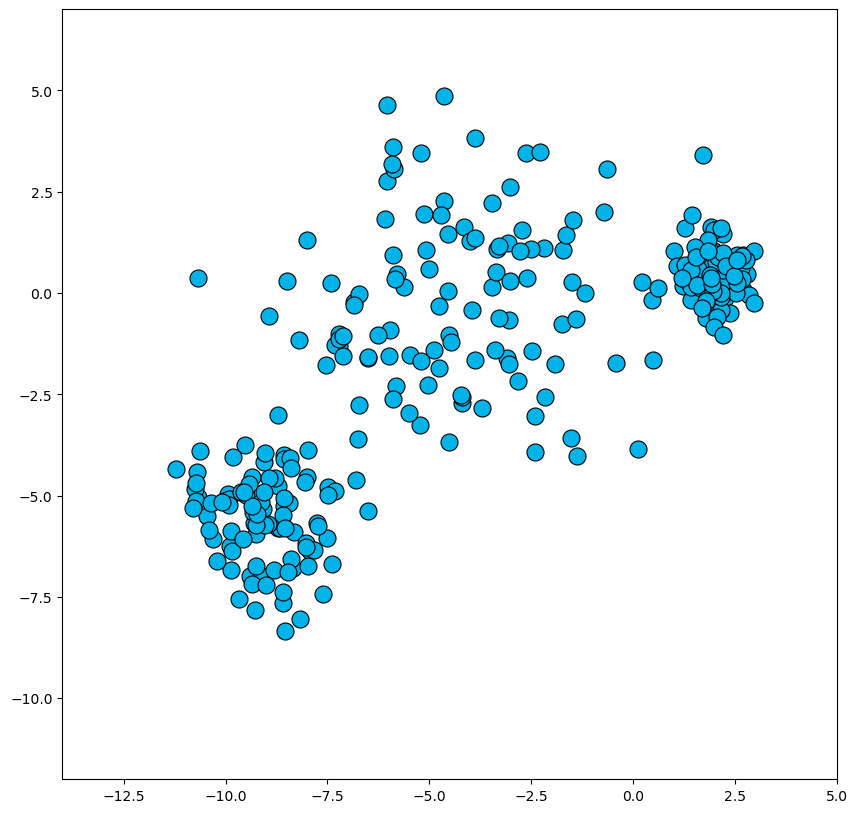

In [31]:
dataset_2 = pd.read_csv('blobs.csv')[80:380].values

plot_dataset(dataset_2, xlim=(-14, 5), ylim=(-12, 7))

TODO: ejecuta DBSCAN con los parámetros por defecto

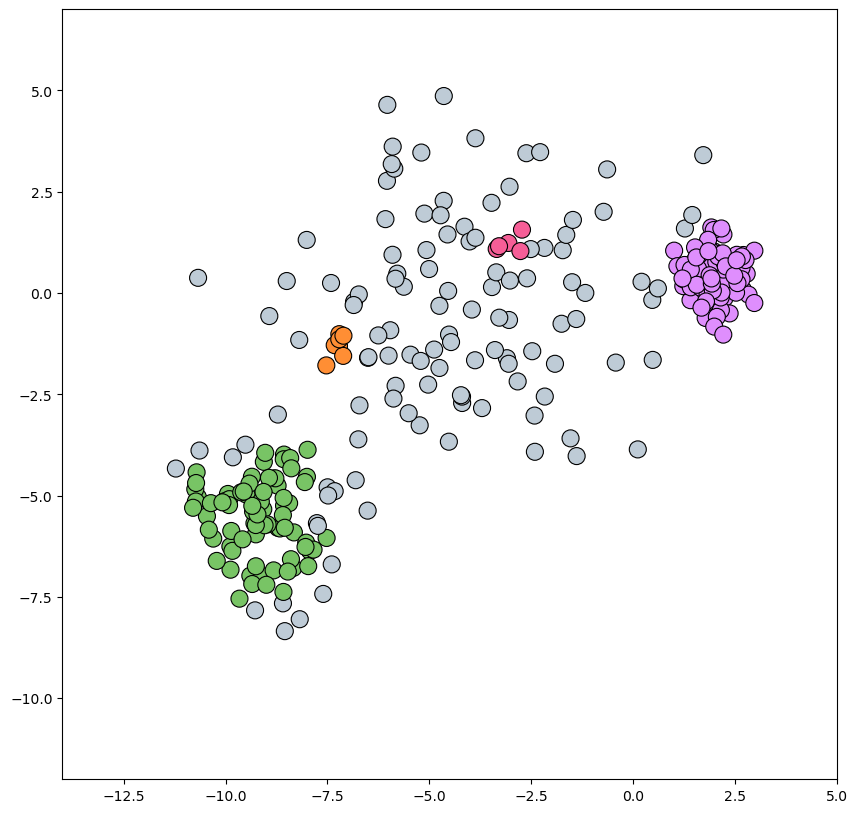

Etiquetas de los clusters con parámetros por defecto: [-1  1  0  0  1  0  0 -1 -1  0  1 -1 -1 -1  3 -1  1 -1  1 -1 -1 -1  1  1
  1 -1  1 -1  0  1 -1  1 -1  1 -1 -1 -1  1  0 -1  0  0  1  1 -1 -1  1  1
 -1 -1  0  1  0  2  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  1  0 -1  0
  0  1 -1 -1 -1 -1  0 -1 -1  0 -1  0  0  0  1  1 -1  0 -1  0 -1  1  0  1
 -1 -1  1 -1  1 -1  0  1  3  1  0  1 -1  1  3  1  1  1  0 -1  0  0 -1  2
  0 -1  1  1  0  1  0  0 -1  0  0 -1  1 -1 -1 -1  0  0  1  0  0 -1 -1 -1
  0 -1  1  1  0  0 -1 -1  0  0  0  0  0  1  0  0  0  0 -1 -1  0  0  0  0
 -1  0 -1 -1 -1  0 -1  0 -1  0  1 -1 -1 -1  1  0  0 -1  0  1  1  0  1  1
 -1  0  1 -1 -1  0 -1 -1  1  0  2  0  1  1  0 -1  1 -1 -1 -1 -1  3  1 -1
  0 -1 -1  1  1  1 -1 -1  0  0  0 -1  0 -1  1  1  0  0 -1 -1  1 -1  0  1
  0  0  0  1  0 -1  3  0  0 -1  0  2  2  0  1  0  0 -1  1 -1 -1  1 -1  0
 -1 -1  0  1 -1 -1  2  1 -1 -1  0  1  1  1  1  0  0 -1  0  1 -1 -1 -1 -1
 -1  1  0 -1  0 -1 -1  0  0 -1  2]


In [32]:
#TODO: ejecuta DBSCAN con los parámetros por defecto
dbscan = DBSCAN()
clustering_labels_4 = dbscan.fit_predict(dataset_2)
plot_clustered_dataset(dataset_2, clustering_labels_4, xlim=(-14, 5), ylim=(-12, 7))
#mostrar
print("Etiquetas de los clusters con parámetros por defecto:", clustering_labels_4)

¿Cómo podemos agrupar estos puntos? Dos escenarios:
- Escenario 1: agrupar el dataset en 3 clusters: el grupo izquierdo, el grupo derecho y el área central. Puede haber puntos de ruido.
- Escenario 2: agrupar el dataset en 2 clusters: el grupo izquierdo y el grupo derecho. Los puntos del centro quedan marcados como ruido.

TODO: prueba diferentes valores de los parámetros de epsilon y min_samples para conseguir el escenario 1.

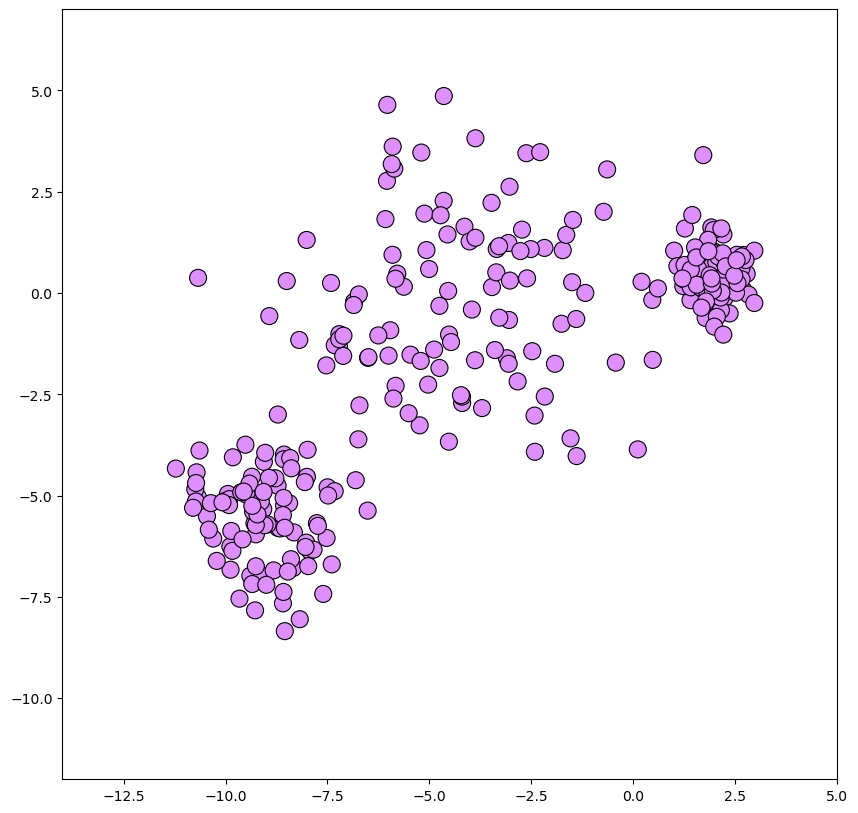

Etiquetas de los clusters para el escenario 1: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


In [35]:
#¿Cómo podemos agrupar estos puntos? Dos escenarios:
#- Escenario 1: agrupar el dataset en 3 clusters: el grupo izquierdo, el grupo derecho y el área central. Puede haber puntos de ruido.

# Escenario 2: agrupar el dataset en 2 clusters: el grupo izquierdo y el grupo derecho. Los puntos del centro quedan marcados como ruido.

#TODO: prueba diferentes valores de los parámetros de epsilon y min_samples para conseguir el escenario 1.
dbscan = DBSCAN(eps=3, min_samples=5)
clustering_labels_5 = dbscan.fit_predict(dataset_2)
plot_clustered_dataset(dataset_2, clustering_labels_5, xlim=(-14, 5), ylim=(-12, 7))
print("Etiquetas de los clusters para el escenario 1:", clustering_labels_5)



Mejor escenario 1

TODO: prueba diferentes valores de los parámetros de epsilon y min_samples para conseguir el escenario 1.

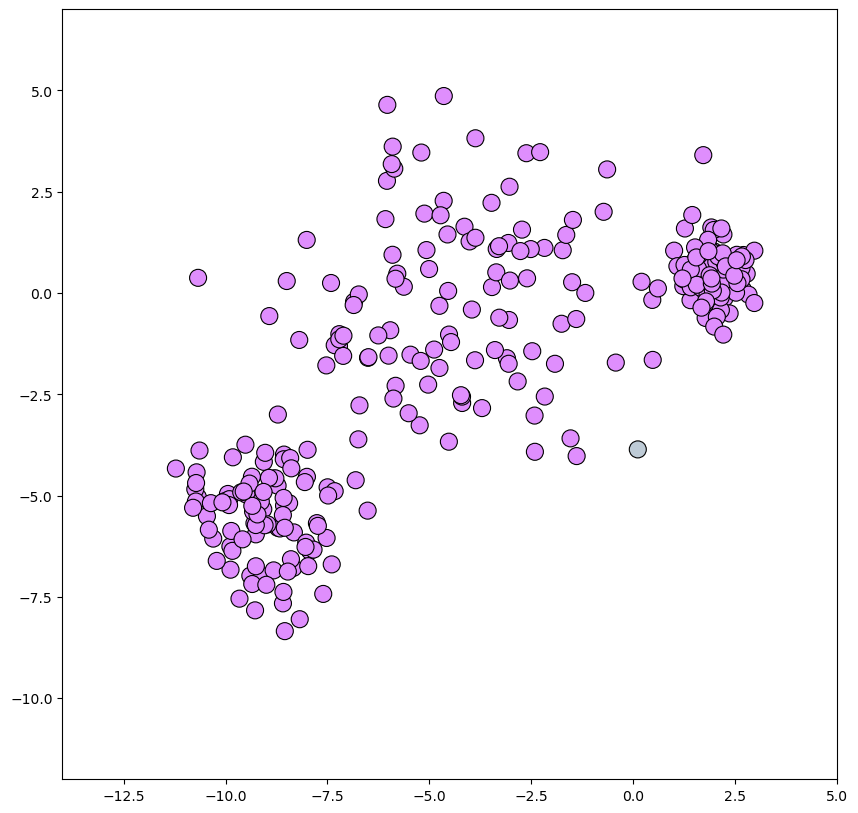

Etiquetas de los clusters para el escenario 2: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0]


: 

In [ ]:
#TODO: prueba diferentes valores de los parámetros de epsilon y min_samples para conseguir el escenario 1.
#cambiemos el color

dbscan = DBSCAN(eps=2, min_samples=10)
clustering_labels_6 = dbscan.fit_predict(dataset_2)
plot_clustered_dataset(dataset_2, clustering_labels_6, xlim=(-14, 5), ylim=(-12, 7))
print("Etiquetas de los clusters para el escenario 2:", clustering_labels_6)

Mejor escenario 2